In [1]:
# MNIST Data Pre-processing
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils  # utilities for one-hot encoding of ground truth values

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10).astype(np.float32)
y_test = np_utils.to_categorical(y_test, 10).astype(np.float32)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Train classifier and save
from Model import classifier
for name in ['A', 'B', 'C']:
    model = classifier(name)
    model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=1)
    model.save('./models/Classifier-'+name+'.h5')
    print('classifier {} done'.format(name))

Epoch 1/1
 2752/60000 [>.............................] - ETA: 5:04 - loss: 0.8593 - acc: 0.7217

KeyboardInterrupt: 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_43 (ZeroPadding2 (None, 30, 30, 1)    0           input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 28, 28, 8)    80          zero_padding2d_43[0][0]          
__________________________________________________________________________________________________
instance_normalization_49 (Inst (None, 28, 28, 8)    2           conv2d_43[0][0]                  
__________________________________________________________________________________________________
activation

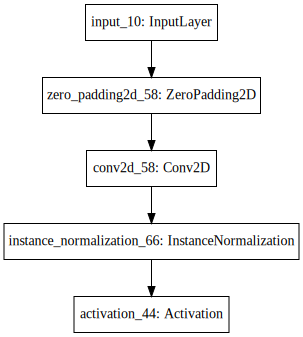

In [9]:
from Generator import *
from Discriminator import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

G = Define_Generator([28,28,1])
D = Define_Discriminator([28,28,1])
G.summary()
D.summary()


from keras.models import Model
from keras.layers import Input
m_in = Input(shape=[28,28,1])
m_out = Conv_InstNorm_Relu(m_in, filters=1, stride=1)
M = Model(m_in, m_out)
M.compile(optimizer='adam', loss='mean_squared_error')
SVG(model_to_dot(M).create(prog='dot', format='svg'))
#plot_model(M, to_file='plots/generator.png')